<a href="https://colab.research.google.com/github/juancaalcaraz/G15PracticaProfesionalizante-II-ISPC/blob/main/ModeloCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade keras tensorflow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [30]:
# Primer modelo que probe
from keras.layers import LeakyReLU
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.6), input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.6)),# Anteriormente probe activation='relu'.
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation=LeakyReLU(alpha=0.6)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation=LeakyReLU(alpha=0.6)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation=LeakyReLU(alpha=0.6)),
    layers.Dense(4, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Cargo las imagenes guardadas en matrices de Numpy.
X_black, X_gorila = np.load('BlackDomina_images.npz'), np.load('GorilaGlue_images.npz')
X_og, X_slur = np.load('OGKush_images.npz'), np.load('Slurricane_images.npz')

In [6]:
#junto las imagenes para entrenar
image_train = np.concatenate((X_black['imagenes'], X_gorila['imagenes'], X_og['imagenes'], X_slur['imagenes']), axis=0)

In [ ]:
#del X_black, X_gorila, X_og, X_slur

In [ ]:
len(image_train)

1852

array([[[166, 148, 215],
        [174, 149, 223],
        [181, 157, 231],
        ...,
        [143, 172, 226],
        [ 51,  80, 114],
        [ 53,  88, 118]],

       [[207, 189, 255],
        [168, 151, 215],
        [210, 193, 255],
        ...,
        [146, 182, 238],
        [ 81, 107, 154],
        [ 44,  80, 108]],

       [[214, 195, 254],
        [159, 142, 207],
        [186, 165, 233],
        ...,
        [152, 184, 249],
        [120, 149, 214],
        [ 66, 103, 128]],

       ...,

       [[112,  98, 152],
        [131, 116, 173],
        [118, 103, 160],
        ...,
        [121, 124, 186],
        [127, 142, 200],
        [ 66, 100, 123]],

       [[138, 125, 178],
        [123, 108, 165],
        [134, 119, 176],
        ...,
        [134, 136, 194],
        [ 93, 105, 159],
        [155, 158, 213]],

       [[125, 111, 166],
        [153, 134, 195],
        [121, 105, 159],
        ...,
        [129, 123, 178],
        [147, 143, 195],
        [134, 135, 191]]], dtype=uint8)
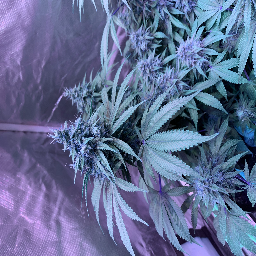

In [ ]:
image_train[2]

In [7]:
import cv2
import numpy as np

# Iteramos sobre todas las imágenes en el conjunto de datos
# Para detectar bordes con Canny y el operador sobel.
for i in range(len(image_train)):

  # Cargamos la imagen para la deteccion de bordes.
  image = image_train[i]

  # Aplicar el operador Sobel en x y en y
  sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

  # Calcular la magnitud y la dirección del gradiente
  magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
  magnitude = np.uint8(magnitude)

  # Aplicar el algoritmo de Canny
  edges = cv2.Canny(image, 100, 200)
  edges = cv2.merge([edges, edges, edges])
  # Sumar las imágenes resultantes de Sobel y Canny
  combined_edges = cv2.addWeighted(magnitude, 0.5, edges, 0.5, 0)
  # La imagen anterior del dataset es reemplazada
  # Por la nueva imagen con bordes detectados.
  image_train[i] = combined_edges

array([[[  0,   0,   0],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [  3,   5,   4],
        [  5,   6,   1],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [  4,   4,   4],
        [  4,   6,   1],
        [  1,   0,   1]],

       [[  0,   0,   0],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [  4,   4,   2],
        [  4,   6,   2],
        [  2,   1,   1]],

       ...,

       [[  5,   6,   7],
        [ 28,  28,  34],
        [ 20,  16,  18],
        ...,
        [206, 210, 210],
        [191, 182, 186],
        [  5,   8,   9]],

       [[  2,   7,  26],
        [ 30,  26,  34],
        [ 10,   8,  16],
        ...,
        [ 40,  44,  42],
        [210, 205, 207],
        [ 26,  37,  31]],

       [[  0,   0,   0],
        [ 26,  21,  22],
        [ 16,  11,  10],
        ...,
        [ 31,  27,  28],
        [204, 196, 200],
        [128, 128, 128]]], dtype=uint8)
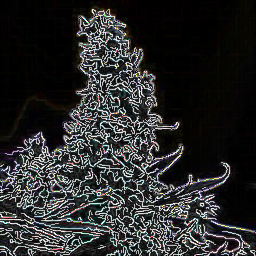

In [10]:
image_train[700]

array([[[ 0,  0,  0],
        [ 4,  4,  4],
        [ 4,  3,  5],
        ...,
        [ 0,  0,  1],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 4,  4,  4],
        [ 4,  2,  6],
        ...,
        [10,  8, 10],
        [10,  8, 10],
        [10,  8, 10]],

       [[ 0,  1,  1],
        [ 4,  4,  5],
        [ 4,  2,  8],
        ...,
        [ 6,  6,  4],
        [ 6,  6,  4],
        [ 6,  6,  4]],

       ...,

       [[10,  7,  9],
        [34, 37, 33],
        [63, 70, 60],
        ...,
        [29, 30, 30],
        [39, 40, 40],
        [32, 32, 32]],

       [[ 4,  5,  5],
        [46, 52, 45],
        [54, 66, 50],
        ...,
        [ 4,  4,  5],
        [20, 22, 22],
        [25, 26, 26]],

       [[ 0,  0,  0],
        [51, 57, 50],
        [53, 64, 48],
        ...,
        [10, 12, 12],
        [ 4,  5,  5],
        [ 0,  0,  0]]], dtype=uint8)
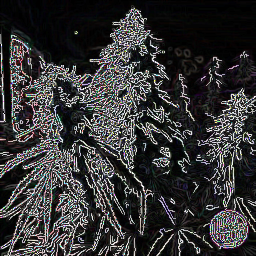

In [ ]:
image_train[4]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[27, 21, 24],
        [30, 24, 28],
        [22, 18, 20],
        ...,
        [16, 22, 22],
        [16, 24, 24],
        [17, 25, 25]],

       [[10,  5,  8],
        [ 9,  8,  8],
        [10, 14, 12],
        ...,
        [ 4, 10, 10],
        [ 4,  8,  9],
        [ 5,  8,  9]],

       [[ 0,  0,  0],
        [ 2,  1,  2],
        [ 6,  7,  6],
        ...,
        [ 0,  1,  2],
        [ 0,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)
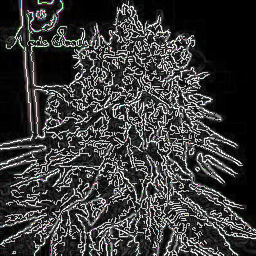

In [16]:
image_train[1610]

In [17]:
#junto las etiquetas para el entreamiento
etiquetas_train = np.concatenate((X_black['etiquetas'], X_gorila['etiquetas'], X_og['etiquetas'], X_slur['etiquetas']), axis=0)

In [18]:
etiquetas_train[2]

'Black Domina'

In [19]:
len(etiquetas_train)

1852

In [20]:
from sklearn.preprocessing import LabelEncoder
# Utilizamos LabelEncoder para pasar a numeros
# las etiquetas de entrenamiento
encoding = LabelEncoder()

In [21]:
encoded_etiquetas = encoding.fit_transform(etiquetas_train)

In [22]:
encoded_etiquetas[4]

0

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(image_train, encoded_etiquetas, test_size= .2, random_state=42)

In [ ]:
#del image_train, encoded_etiquetas

In [ ]:
#Anteriormente probe las etiquetas categoricas
#en lugar de LabelEncoder
"""
from keras.utils import to_categorical

# Convertir las etiquetas en formato one-hot
y_train_categorical = to_categorical(y_train, num_classes=4)
y_validation_categorical = to_categorical(y_validation, num_classes=4)
"""

In [ ]:
#Anteriormente probe agrandar el dataset con las mismas imagenes
#aplicandoles diferentes filtros, esta funcion se aplicaba
#para no cargar todo a la memoria si no por lotes de 2 imagenes.
"""
import tensorflow as tf

@tf.function
def train_step(X_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(X_batch, training=True)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Entrenamiento en lote
for epoch in range(3): # 5 epocas
    print("Epoch:", epoch+1)
    for i in range(0, len(X_train), 2):
        X_batch = X_train[i:i+2].astype('float32')  # Tomar solo 2 ejemplos como lote
        y_batch = y_train[i:i+2]
        loss = train_step(X_batch, y_batch)  # Llama a la función de entrenamiento
        print("Batch:", i+1, "Loss:", loss)

    # Evaluación en conjunto de validación al final de cada época
    val_loss, val_acc = model.evaluate(X_validation.astype('float32'), y_validation)
    print("Validation Loss:", val_loss, "Validation Accuracy:", val_acc)
"""

In [31]:
# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=7, batch_size=24, validation_data=(X_validation, y_validation))

Epoch 1/7
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.2926 - loss: 1742.4735 - val_accuracy: 0.3612 - val_loss: 40.6255
Epoch 2/7
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.4261 - loss: 25.9259 - val_accuracy: 0.4097 - val_loss: 8.5843
Epoch 3/7
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.6867 - loss: 3.4194 - val_accuracy: 0.4394 - val_loss: 9.6933
Epoch 4/7
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.8177 - loss: 1.8003 - val_accuracy: 0.4501 - val_loss: 6.6747
Epoch 5/7
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.8673 - loss: 1.1321 - val_accuracy: 0.4501 - val_loss: 8.3514
Epoch 6/7
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9215 - loss: 0.4641 - val_accuracy: 0.4852 - val_loss: 8.1054
Epoch 7/7
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9463 - loss: 0.4130 - val_accuracy: 0.5013 - val_loss: 6.3146


In [25]:

X_tblack, X_tgorila = np.load('TBlackDomina_images.npz'), np.load('TGorilaGlue_images.npz')
X_tog, X_tslur = np.load('TOGKush_images.npz'), np.load('TSlurricane_images.npz')

In [33]:
etiqueta_test = np.concatenate((X_tblack['etiquetas'], X_tgorila['etiquetas'], X_tog['etiquetas'], X_tslur['etiquetas']), axis=0)
image_test = np.concatenate((X_tblack['imagenes'], X_tgorila['imagenes'], X_tog['imagenes'], X_tslur['imagenes']), axis=0)

In [34]:
#test_labels = encoding.transform(etiqueta_test.reshape(-1,1)).toarray()
test_labels = encoding.transform(etiqueta_test)

In [36]:
for i in range(len(image_test)):

  # Cargar la imagen a procesar.
  image = image_test[i]

  # Aplicar el operador Sobel en x y en y a cada canal de color
  sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

  # Calcular la magnitud y la dirección del gradiente
  magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
  magnitude = np.uint8(magnitude)

  # Aplicar el algoritmo de Canny
  edges = cv2.Canny(image, 100, 200)
  edges = cv2.merge([edges, edges, edges])
  # Sumar las imágenes resultantes de Sobel y Canny
  combined_edges = cv2.addWeighted(magnitude, 0.5, edges, 0.5, 0)
  image_test[i] = combined_edges

In [37]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(image_test.astype('float32'), test_labels)

print('Test accuracy:', test_acc) #Con realce 0.287(5), # nitidez (3) 0.287 # sin filtro 0.287(3) # canny y solber (3 epocas) 0.51, (7 epocas) 0.56

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5430 - loss: 5.8844
Test accuracy: 0.5625


In [ ]:
from tensorflow.keras.models import save_model

#Para guardar el modelo cuando este funcione bien.
model.save('primer_modelo_entrenado_056.h5')